In [2]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
transferData = pd.read_csv('transferData.csv')
transferData

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
0,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
1,luca-mazzitelli,24/25,"Jun 30, 2025",Como,Frosinone,€4.00m,End of loan
2,luca-mazzitelli,24/25,"Jul 26, 2024",Frosinone,Como,€4.00m,loan transfer
3,luca-mazzitelli,23/24,"Jul 1, 2023",Monza,Frosinone,€3.00m,?
4,luca-mazzitelli,22/23,"Jun 30, 2023",Frosinone,Monza,€3.00m,End of loan
...,...,...,...,...,...,...,...
156753,curtis-yebli,18/19,"Aug 8, 2018",Bari,Arsenal Kyiv,€100k,free transfer
156754,curtis-yebli,17/18,"Jun 30, 2018",Arezzo,Bari,€100k,End of loan
156755,curtis-yebli,17/18,"Jul 11, 2017",Bari,Arezzo,€75k,loan transfer
156756,curtis-yebli,16/17,"Jul 1, 2016",Bari U19,Bari,€50k,-


In [18]:
transfermarktId = pd.read_csv('transfermarktId.csv')
transfermarktId

,Name,Query,TransfermarktId
0,Luca Mazzitelli,luca-mazzitelli,226025
1,Pablo Pérez,pablo-perez,711628
2,Leandro Romagnoli,leandro-romagnoli,15694
3,Alessandro Florenzi,alessandro-florenzi,130365
4,Alisson,alisson,105470
...,...,...,...
14196,Mark Foden,mark-foden,251492
14197,Dylan McGoey,dylan-mcgoey,435092
14198,Barry Richardson,barry-richardson,48971
14199,Steven Alzate,steven-alzate,476237


In [4]:
fifaRatings = pd.read_csv('male_players.csv', low_memory=False)
pd.options.display.max_rows
fifaRatings

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13


In [8]:
counter = 0
for column in fifaRatings.columns:
    counter += 1
print(counter)

109


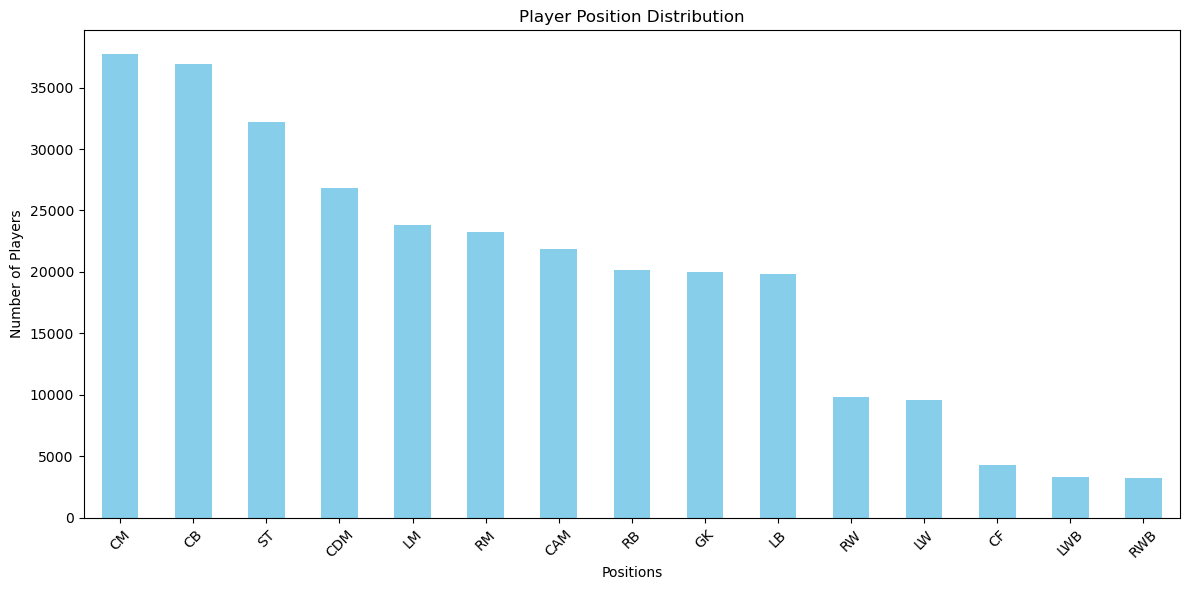

In [36]:
positions = fifaRatings['player_positions'].str.get_dummies(sep=', ')

# 2. Her pozisyondaki toplam oyuncu sayısını hesaplama
position_counts = positions.sum().sort_values(ascending=False)

# 3. En fazla oynanan pozisyonları görselleştirme
plt.figure(figsize=(12, 6))
position_counts.plot(kind='bar', color='skyblue')
plt.title('Player Position Distribution')
plt.xlabel('Positions')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

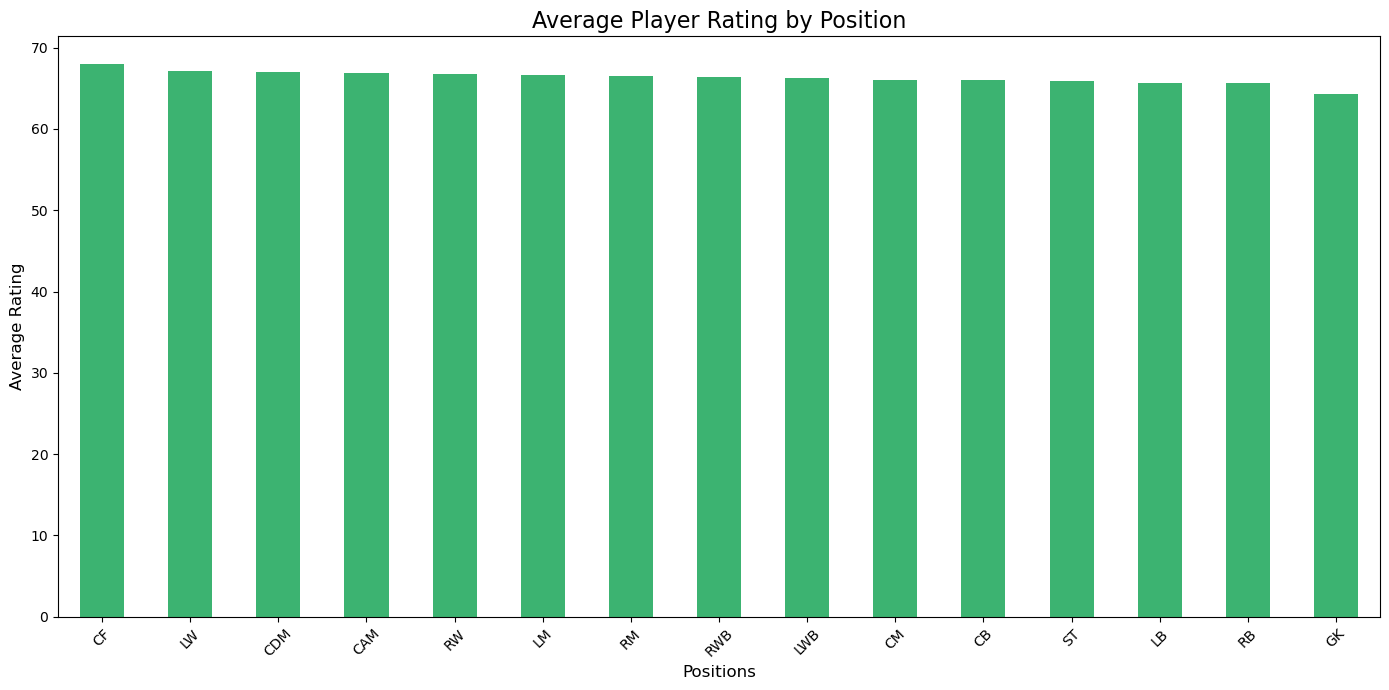

In [38]:
# 1. One-hot encode işlemi
positions = fifaRatings['player_positions'].str.get_dummies(sep=', ')

# 2. Pozisyona göre toplam oyuncu sayısı ve toplam rating hesaplama
position_ratings = positions.T.dot(fifaRatings['overall'])

# 3. Pozisyona göre ortalama rating hesaplama
position_avg_rating = position_ratings / positions.sum()

# 4. Ortalama rating değerlerini sıralama
position_avg_rating = position_avg_rating.sort_values(ascending=False)

# 5. Görselleştirme
plt.figure(figsize=(14, 7))
position_avg_rating.plot(kind='bar', color='mediumseagreen')
plt.title('Average Player Rating by Position', fontsize=16)
plt.xlabel('Positions', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

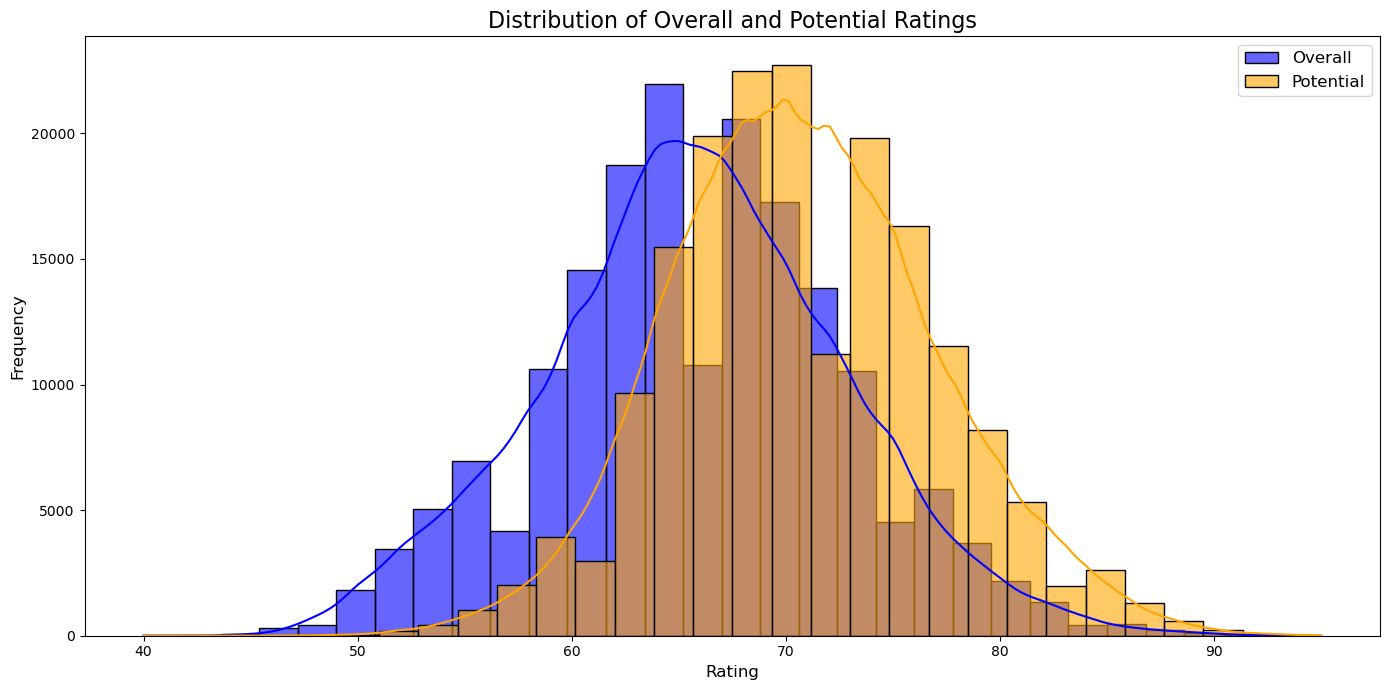

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Grafik boyutu ayarla
plt.figure(figsize=(14, 7))

# 2. `overall` histogram ve KDE
sns.histplot(fifaRatings['overall'], kde=True, color='blue', bins=30, label='Overall', alpha=0.6)

# 3. `potential` histogram ve KDE
sns.histplot(fifaRatings['potential'], kde=True, color='orange', bins=30, label='Potential', alpha=0.6)

# 4. Başlık ve etiketler
plt.title('Distribution of Overall and Potential Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()

# 5. Grafiği göster
plt.show()

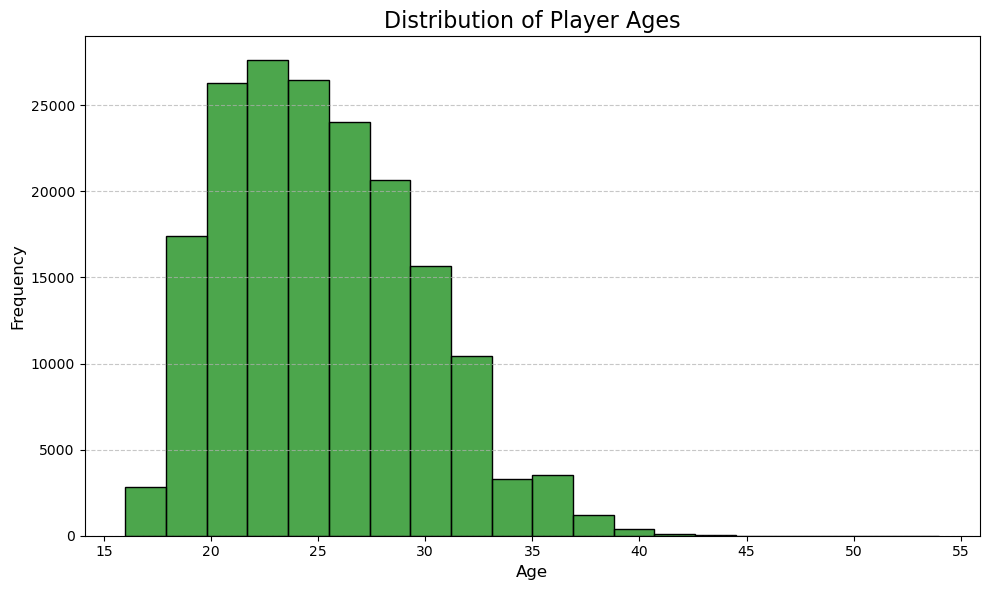

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutunu ayarla
plt.figure(figsize=(10, 6))

# `age` histogramı oluştur
sns.histplot(fifaRatings['age'], bins=20, kde=False, color='green', alpha=0.7)

# Başlık ve eksen etiketleri
plt.title('Distribution of Player Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster
plt.show()

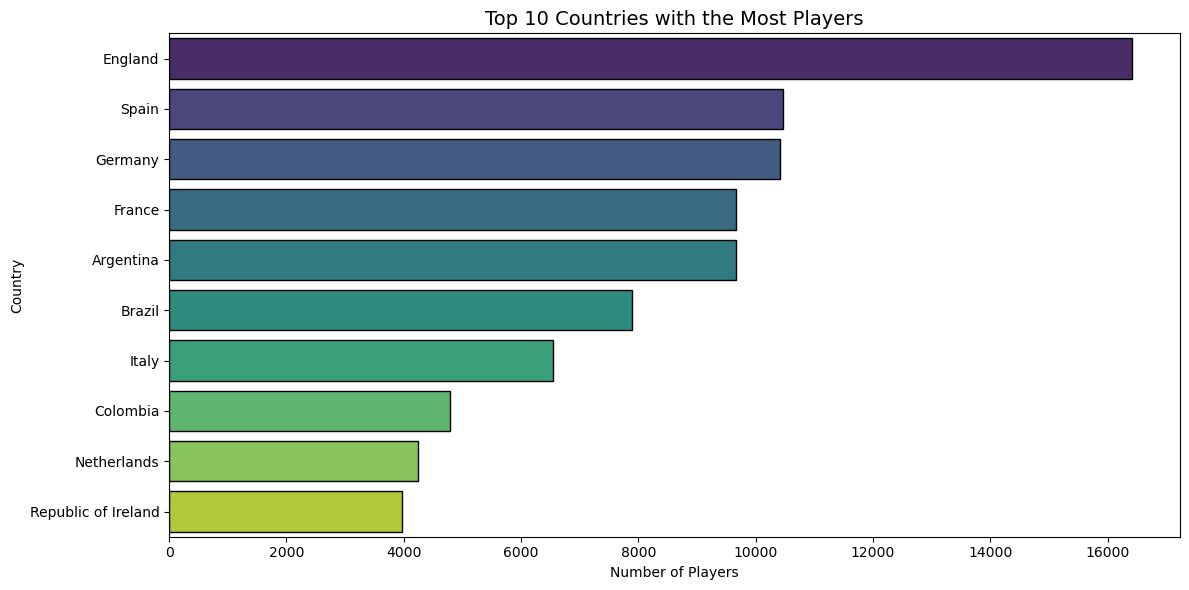

In [54]:
# Top 10 countries by player count
top_countries = (
    fifaRatings.groupby("nationality_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name="player_count")
)

# Visualization using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_countries,
    x="player_count",
    y="nationality_name",
    hue="nationality_name",  # `hue` kullanıyoruz
    dodge=False,  # Tek bir bar göstermek için
    edgecolor="black",
    palette="viridis",
    legend=False  # Legendi kapatıyoruz
)
plt.xlabel("Number of Players")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Most Players", fontsize=14)
plt.tight_layout()
plt.show()

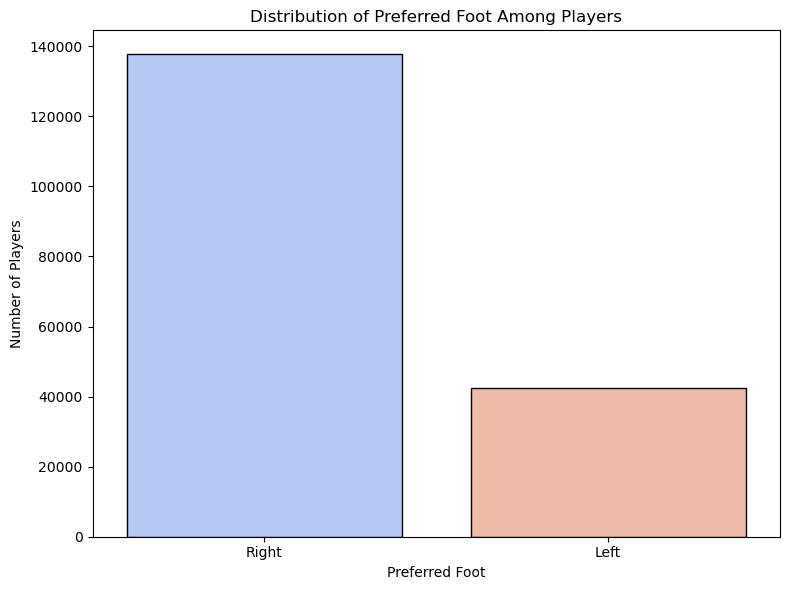

In [58]:
# Group by preferred_foot to count players
foot_preference = fifaRatings["preferred_foot"].value_counts().reset_index()
foot_preference.columns = ["preferred_foot", "count"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=foot_preference,
    x="preferred_foot",
    y="count",
    hue="preferred_foot",  # `hue` kullanımı
    dodge=False,
    palette="coolwarm",
    edgecolor="black",
    legend=False  # Legend'i kaldırıyoruz
)
plt.xlabel("Preferred Foot")
plt.ylabel("Number of Players")
plt.title("Distribution of Preferred Foot Among Players")
plt.tight_layout()
plt.show()

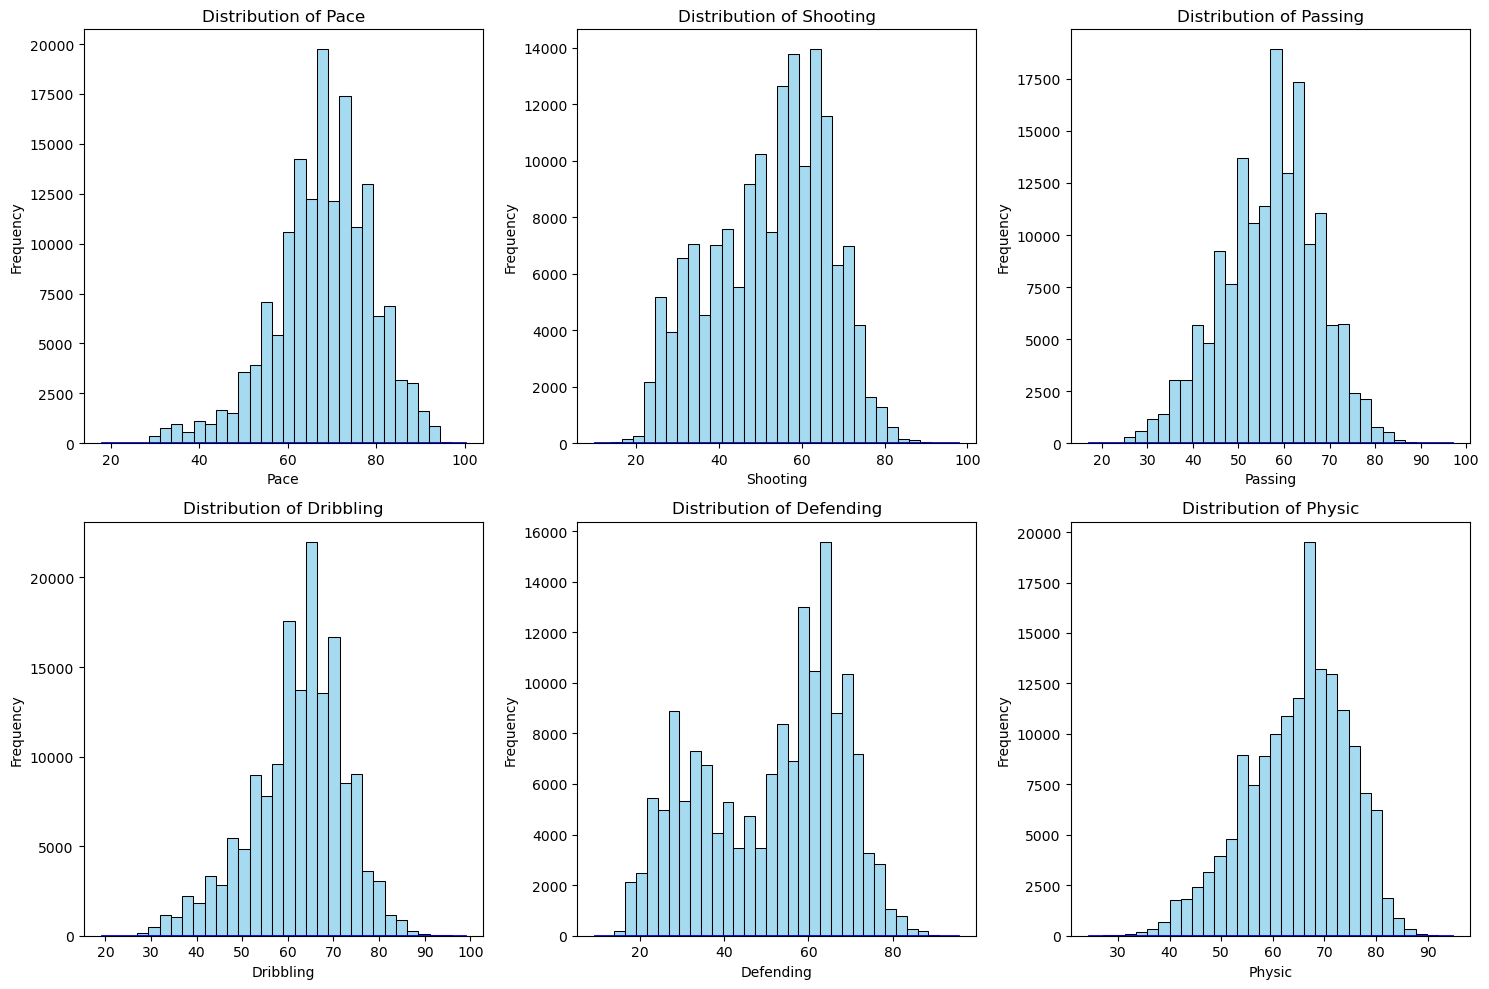

In [72]:
# Temel yetenek sütunları
skills = ["pace", "shooting", "passing", "dribbling", "defending", "physic"]

# Subplot ile görselleştirme
plt.figure(figsize=(15, 10))
for i, skill in enumerate(skills, 1):
    plt.subplot(2, 3, i)
    # Histogram
    sns.histplot(fifaRatings[skill], bins=30, color="skyblue", edgecolor="black", kde=False)
    # Yoğunluk eğrisi
    sns.kdeplot(fifaRatings[skill], color="blue", linewidth=2)
    plt.title(f"Distribution of {skill.capitalize()}")
    plt.xlabel(skill.capitalize())
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

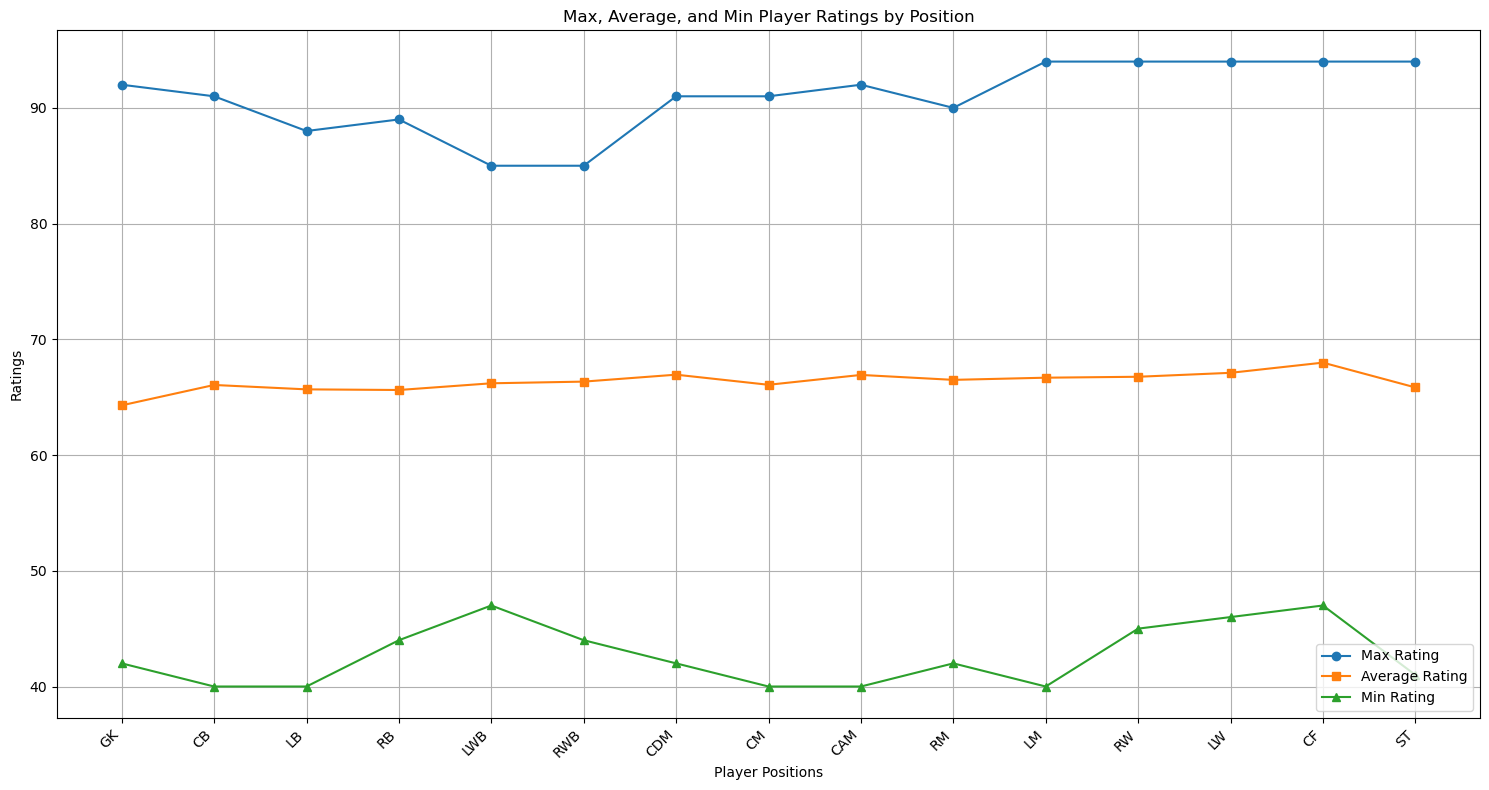

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Pozisyonları ayrıştır ve one-hot encode et
position_df = fifaRatings["player_positions"].str.get_dummies(sep=", ")

# Pozisyon bazında rating değerlerini hesaplamak için bir liste oluştur
rating_data = []

for position in position_df.columns:
    # Her pozisyondaki oyuncuların ratinglerini filtrele
    position_ratings = fifaRatings.loc[position_df[position] == 1, "overall"]
    
    # Pozisyon bazında max, mean ve min değerleri hesapla ve listeye ekle
    rating_data.append({
        "position": position,
        "max": position_ratings.max(),
        "mean": position_ratings.mean(),
        "min": position_ratings.min()
    })

# Listeyi DataFrame'e dönüştür
rating_by_position = pd.DataFrame(rating_data)

# Özel sıralama listesi
custom_order = ["GK", "CB", "LB", "RB", "LWB", "RWB", "CDM", "CM", "CAM", "RM", "LM", "RW", "LW", "CF", "ST"]

# Pozisyon sütununu kategorik hale getir ve sıralama uygula
rating_by_position["position"] = pd.Categorical(
    rating_by_position["position"],
    categories=custom_order,
    ordered=True
)

# Sıralamayı uygula
rating_by_position = rating_by_position.sort_values(by="position")

# Görselleştirme
plt.figure(figsize=(15, 8))

# Max rating
plt.plot(rating_by_position["position"], rating_by_position["max"], label="Max Rating", marker='o')

# Average rating
plt.plot(rating_by_position["position"], rating_by_position["mean"], label="Average Rating", marker='s')

# Min rating
plt.plot(rating_by_position["position"], rating_by_position["min"], label="Min Rating", marker='^')

plt.xlabel("Player Positions")
plt.ylabel("Ratings")
plt.title("Max, Average, and Min Player Ratings by Position")
plt.xticks(rotation=45, ha="right")  # Pozisyon isimlerini okunaklı hale getirme
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
def convert_to_integer(value):
    value = value.replace('€', '').strip()
    if 'm' in value:
        return int(float(value.replace('m', '')) * 1_000_000)
    elif 'k' in value:
        return int(float(value.replace('k', '')) * 1_000)
    else:
        return 0

In [30]:
yearsList = ['14/15','15/16', '16/17', '17/18', '18/19', '19/20', '20/21', '21/22','22/23','23/24']

In [97]:
transferData = transferData[transferData['Season_Name'].isin(yearsList)]

In [99]:
marketValues = transferData[transferData['Market_Value'] != '-']

In [101]:
marketValues.loc[:, 'Market_Value'] = marketValues['Market_Value'].apply(convert_to_integer)

In [103]:
marketValues = marketValues.drop(['Date', 'Transfer_Fee'], axis=1)

In [105]:
marketValues

,Query,Season_Name,Old_Club,New_Club,Market_Value
3,luca-mazzitelli,23/24,Monza,Frosinone,3000000
4,luca-mazzitelli,22/23,Frosinone,Monza,3000000
5,luca-mazzitelli,22/23,Monza,Frosinone,2400000
6,luca-mazzitelli,21/22,Sassuolo,Monza,2800000
7,luca-mazzitelli,20/21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...
156752,curtis-yebli,18/19,Arsenal Kyiv,Without Club,100000
156753,curtis-yebli,18/19,Bari,Arsenal Kyiv,100000
156754,curtis-yebli,17/18,Arezzo,Bari,100000
156755,curtis-yebli,17/18,Bari,Arezzo,75000


In [109]:
marketValues = pd.merge(marketValues, transfermarktId, on='Query', how='left')

In [111]:
category_dict = {'23/24': 24, '22/23': 23, '21/22': 22, '20/21': 21, '19/20': 20, '18/19': 19, '17/18':18, '16/17': 17, '15/16': 16, '14/15':15}

In [115]:
pd.set_option('future.no_silent_downcasting', True)
marketValues['Season_Name'] = marketValues['Season_Name'].replace(category_dict)

In [117]:
marketValues

,Query,Season_Name,Old_Club,New_Club,Market_Value,Name,TransfermarktId
0,luca-mazzitelli,24,Monza,Frosinone,3000000,Luca Mazzitelli,226025
1,luca-mazzitelli,23,Frosinone,Monza,3000000,Luca Mazzitelli,226025
2,luca-mazzitelli,23,Monza,Frosinone,2400000,Luca Mazzitelli,226025
3,luca-mazzitelli,22,Sassuolo,Monza,2800000,Luca Mazzitelli,226025
4,luca-mazzitelli,21,AC Pisa,Sassuolo,2800000,Luca Mazzitelli,226025
...,...,...,...,...,...,...,...
77472,curtis-yebli,19,Arsenal Kyiv,Without Club,100000,Curtis Yebli,411149
77473,curtis-yebli,19,Bari,Arsenal Kyiv,100000,Curtis Yebli,411149
77474,curtis-yebli,18,Arezzo,Bari,100000,Curtis Yebli,411149
77475,curtis-yebli,18,Bari,Arezzo,75000,Curtis Yebli,411149


In [119]:
new_column_order = ['TransfermarktId', 'Name', 'Season_Name','Old_Club','New_Club','Market_Value']

In [123]:
marketValues = marketValues[new_column_order]
marketValues

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
0,226025,Luca Mazzitelli,24,Monza,Frosinone,3000000
1,226025,Luca Mazzitelli,23,Frosinone,Monza,3000000
2,226025,Luca Mazzitelli,23,Monza,Frosinone,2400000
3,226025,Luca Mazzitelli,22,Sassuolo,Monza,2800000
4,226025,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...,...
77472,411149,Curtis Yebli,19,Arsenal Kyiv,Without Club,100000
77473,411149,Curtis Yebli,19,Bari,Arsenal Kyiv,100000
77474,411149,Curtis Yebli,18,Arezzo,Bari,100000
77475,411149,Curtis Yebli,18,Bari,Arezzo,75000


In [125]:
namesAndClubsTransfer = marketValues[['Name','Old_Club','New_Club']]

In [127]:
fifaNamesAndClub = fifaRatings[['short_name','club_name']]

In [129]:
pd.set_option('display.max_columns', None)

fifaRatings['club_name'].dropna()
list = fifaRatings['club_name'].unique().tolist()
for i in list:
    if type(i) == float:
        list.remove(i)

list.sort()
list

['12 de Octubre',
 '1860 München',
 '9 de Octubre',
 'AC Arles Avignon',
 'AC Barnechea',
 'ADO Den Haag',
 'AEK Athens',
 'AFC Bournemouth',
 'AFC Eskilstuna',
 'AFC Wimbledon',
 'AGF',
 'AIK',
 'APOEL',
 'AS Béziers',
 'AS Eupen',
 'ATK Mohun Bagan',
 'AZ Alkmaar',
 'AaB',
 'Aalesund',
 'Aberdeen',
 'Abha',
 'Academia Puerto Cabello',
 'Academica Clinceni',
 'Accrington Stanley',
 'Adana Demirspor',
 'Adanaspor',
 'Adelaide United',
 'Admira',
 'Ajaccio',
 'Ajax',
 'Akhisar Belediyespor',
 'Al Adalh',
 'Al Ahli Jeddah',
 'Al Ain',
 'Al Batin',
 'Al Ettifaq',
 'Al Faisaly',
 'Al Fateh',
 'Al Fayha',
 'Al Hazem',
 'Al Hilal',
 'Al Ittihad',
 'Al Khaleej',
 'Al Nassr',
 'Al Okhdood',
 'Al Orobah',
 'Al Qadisiyah',
 'Al Raed',
 'Al Riyadh',
 'Al Shabab',
 'Al Shoulla',
 'Al Taawon',
 'Al Tai',
 'Al Wahda',
 'Alanyaspor',
 'Albacete',
 'Albirex Niigata',
 'Alcorcón',
 'Aldosivi',
 'Alianza Lima',
 'Alianza Petrolera',
 'Almere City',
 'Almería',
 'Altay',
 'Always Ready',
 'Amiens SC',
 '

In [137]:
checkDf = marketValues[(marketValues['Old_Club'].isin(list)) | (marketValues['New_Club'].isin(list))]
checkDf

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value


In [143]:
for club in marketValues['Old_Club']:
    print(club) # SOME SPACES IN FRONT OF AND BACK OF CLUB NAME 

  Monza
  Frosinone
  Monza
  Sassuolo
  AC Pisa
  Sassuolo
  Virtus Entella
  Sassuolo
  Genoa
  Sassuolo
  Brescia
  Sassuolo
  AS Roma
  Brescia
  AS Roma
  Südtirol
  Roma U19
  Sevilla Atl.
  Sevilla Atl.
  AS Roma
  AC Milan
  AS Roma
  Paris SG
  AS Roma
  Valencia
  AS Roma
  AS Roma
  Internacional
  Inter
  Minnesota
  Seattle
  Montpellier
  CSKA Moscow
 Without Club
  Sevilla FC
  Real Madrid
  Mohun Bagan SG
  FC Sochaux
 Without Club
  Atlanta
 Without Club
  Genclerbirligi
  Saint-Étienne
  AZ Alkmaar
  Eyüpspor
  Genclerbirligi
  Bursaspor
  Genclerbirligi
  Sporting CP
  Sampdoria
  Udinese Calcio
  Sampdoria
  Udinese Calcio
  Bayern Munich
  Bor. Dortmund
  Hertha BSC
  1.FSV Mainz 05
  Feyenoord
  FC Basel
  KRC Genk
  FC Basel
  Feyenoord
  AS Nancy
  Montpellier
 Without Club
  Slovan Liberec
 Without Club
  Zaglebie Lubin
 Without Club
  PAOK Salonika
  Slavia Prague
  Fenerbahce
  Bursaspor
  Fenerbahce
  Al-Ain
  Fenerbahce
  Adana Demirspor
  Aris Saloniki
  S

In [145]:
marketValues['New_Club'] = marketValues['New_Club'].str.lstrip() ## başlarında iki boşluk var
marketValues['New_Club'] = marketValues['New_Club'].str.rstrip()
marketValues['Old_Club'] = marketValues['Old_Club'].str.lstrip() ## başlarında iki boşluk var
marketValues['Old_Club'] = marketValues['Old_Club'].str.rstrip()

In [147]:
filtered_df = marketValues[(marketValues['Old_Club'].isin(list)) | (marketValues['New_Club'].isin(list))]
filtered_df

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
0,226025,Luca Mazzitelli,24,Monza,Frosinone,3000000
1,226025,Luca Mazzitelli,23,Frosinone,Monza,3000000
2,226025,Luca Mazzitelli,23,Monza,Frosinone,2400000
3,226025,Luca Mazzitelli,22,Sassuolo,Monza,2800000
4,226025,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...,...
77445,448633,Randi Goteni,18,Troyes,AS Béziers,150000
77451,307807,Dario Maresic,20,Sturm Graz,Stade Reims,3000000
77454,381069,Marcus Godinho,23,Vancouver,Korona Kielce,400000
77457,319825,Benjamin Ozegovic,21,SCR Altach,WSG Tirol,75000


In [52]:
pd.set_option('display.max_rows', None)
list1 = merged['Old_Club'].unique().tolist()
for i in list1:
    if type(i) == float:
        list1.remove(i)
list1.sort()
list1

["1.FC K'lautern",
 '1.FC Kaan-M.',
 '1.FC Köln',
 '1.FC Köln II',
 '1.FC Köln U19',
 '1.FC Magdeburg',
 '1.FC Nuremberg',
 '1.FSV Mainz 05',
 '1.SC Znojmo',
 '12 de Octubre',
 '1461 Trabzon',
 '1860 Munich',
 '1860 München II',
 '1860 Rosenheim',
 '1922 Konya',
 '1º de Agosto',
 '24 Erzincanspor',
 '3 de Febrero',
 '52 Orduspor FK',
 '9 de Julio',
 'A. Aachen II',
 'A. Bucaramanga',
 'A. Keciörengücü',
 'A. Klagenfurt',
 'A. Lustenau',
 'A. Malagueño',
 'A. Selcukspor',
 'A. Vienna Res.',
 'AB Argir',
 'ABC FC',
 'AC Ajaccio',
 'AC Ajaccio B',
 'AC Arles',
 'AC Arles-Avignon',
 'AC Barnechea',
 'AC Bellinzona',
 'AC Escaldes',
 'AC Horsens',
 'AC Horsens U19',
 'AC Kajaani',
 'AC Milan',
 'AC Oulu',
 'AC Pisa',
 'AC Torrellano',
 'ACBB',
 'ACR Messina',
 'ACS Berceni',
 'ACS Poli',
 'ACSM Poli Iasi',
 'ACSO Filiasi',
 'AD 9 de Octubre',
 'AD Alcorcón',
 'AD Alcorcón B',
 'AD Almudévar',
 'AD Cantolao',
 'AD Carmelita',
 'AD Ceuta',
 'AD Oliveirense',
 'AD San Carlos',
 'ADI Metapán',


In [128]:
filtered_df = merged[(merged['Old_Club'].isin(list)) | (merged['New_Club'].isin(list))]
filtered_df

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
0,226025,Luca Mazzitelli,24,Monza,Frosinone,3000000
1,226025,Luca Mazzitelli,23,Frosinone,Monza,3000000
2,226025,Luca Mazzitelli,23,Monza,Frosinone,2400000
3,226025,Luca Mazzitelli,22,Sassuolo,Monza,2800000
4,226025,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...,...
77445,448633,Randi Goteni,18,Troyes,AS Béziers,150000
77451,307807,Dario Maresic,20,Sturm Graz,Stade Reims,3000000
77454,381069,Marcus Godinho,23,Vancouver,Korona Kielce,400000
77457,319825,Benjamin Ozegovic,21,SCR Altach,WSG Tirol,75000


In [56]:
pd.reset_option('display.max_rows', None)
filtered_df

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value
0,226025,Luca Mazzitelli,24,Monza,Frosinone,3000000
1,226025,Luca Mazzitelli,23,Frosinone,Monza,3000000
2,226025,Luca Mazzitelli,23,Monza,Frosinone,2400000
3,226025,Luca Mazzitelli,22,Sassuolo,Monza,2800000
4,226025,Luca Mazzitelli,21,AC Pisa,Sassuolo,2800000
...,...,...,...,...,...,...
77445,448633,Randi Goteni,18,Troyes,AS Béziers,150000
77451,307807,Dario Maresic,20,Sturm Graz,Stade Reims,3000000
77454,381069,Marcus Godinho,23,Vancouver,Korona Kielce,400000
77457,319825,Benjamin Ozegovic,21,SCR Altach,WSG Tirol,75000


In [130]:
namesAndClubsTransfer

,Name,Old_Club,New_Club
0,Luca Mazzitelli,Monza,Frosinone
1,Luca Mazzitelli,Frosinone,Monza
2,Luca Mazzitelli,Monza,Frosinone
3,Luca Mazzitelli,Sassuolo,Monza
4,Luca Mazzitelli,AC Pisa,Sassuolo
...,...,...,...
77472,Curtis Yebli,Arsenal Kyiv,Without Club
77473,Curtis Yebli,Bari,Arsenal Kyiv
77474,Curtis Yebli,Arezzo,Bari
77475,Curtis Yebli,Bari,Arezzo


In [132]:
fifaNamesAndClub[fifaNamesAndClub['short_name'] == 'L. Mazzitelli']

,short_name,club_name
2750,L. Mazzitelli,Frosinone
22179,L. Mazzitelli,Frosinone
60809,L. Mazzitelli,Sassuolo
78474,L. Mazzitelli,Sassuolo
96224,L. Mazzitelli,Genoa
114271,L. Mazzitelli,Sassuolo
137034,L. Mazzitelli,Sassuolo
159790,L. Mazzitelli,Brescia


In [195]:
# Fifa veri setinden gerekli sütunları liste olarak alın
# Başındaki boşlukları kaldırma
namesAndClubsTransfer.loc[:, 'New_Club'] = namesAndClubsTransfer['New_Club'].str.lstrip() 
namesAndClubsTransfer.loc[:, 'Old_Club'] = namesAndClubsTransfer['Old_Club'].str.rstrip()
fifa_short_names = fifaNamesAndClub['short_name'].to_list()
fifa_club_names = fifaNamesAndClub['club_name'].to_list()

# Eşleşme için bir sözlük oluşturun
dictMatchTransferToFifa = {}

# Kısaltma fonksiyonu
def shorten_name(full_name):
    parts = full_name.split()
    if len(parts) < 2:
        return full_name
    return f"{parts[0][0]}. {' '.join(parts[1:])}"

# Transfer veri setindeki her satır üzerinde çalışın
for _, row in tqdm(namesAndClubsTransfer.iterrows()):
    player_name = row['Name']
    old_club = row['Old_Club']
    new_club = row['New_Club']
    # Tam eşleşme kontrolü
    if player_name in fifa_short_names:
        if old_club in fifa_club_names or new_club in fifa_club_names:
            dictMatchTransferToFifa[player_name] = player_name
    # Kısaltılmış isim eşleşmesi
    else:
        short_name = shorten_name(player_name)
        if short_name in fifa_short_names:
            if old_club in fifa_club_names or new_club in fifa_club_names:
                dictMatchTransferToFifa[player_name] = short_name

77477it [06:17, 205.24it/s]


{}

In [197]:
dictMatchTransferToFifa

{'Luca Mazzitelli': 'L. Mazzitelli',
 'Alessandro Florenzi': 'A. Florenzi',
 'Alisson': 'Alisson',
 "Danilo D'Ambrosio": "D. D'Ambrosio",
 'Daniel Congré': 'D. Congré',
 'Isco': 'Isco',
 'Florentin Pogba': 'F. Pogba',
 'Jeffrey Gouweleeuw': 'J. Gouweleeuw',
 'Bogdan Stancu': 'B. Stancu',
 'Bruno Fernandes': 'Bruno Fernandes',
 'Jean-Paul Boëtius': 'J. Boëtius',
 'Miroslav Stoch': 'M. Stoch',
 'Badou Ndiaye': 'B. Ndiaye',
 'Cafú': 'Cafú',
 'Mattia Caldara': 'M. Caldara',
 'Matías Caruzzo': 'M. Caruzzo',
 'Joshua Brenet': 'J. Brenet',
 'Muhammet Demir': 'M. Demir',
 'Martín Cauteruccio': 'M. Cauteruccio',
 'Marco Ruben': 'M. Ruben',
 'Bartosz Bereszyński': 'B. Bereszyński',
 'Romain Philippoteaux': 'R. Philippoteaux',
 'Roberto Gagliardini': 'R. Gagliardini',
 'Serge Aurier': 'S. Aurier',
 'Andre Gray': 'A. Gray',
 'Aras Özbiliz': 'A. Özbiliz',
 'Tom Heaton': 'T. Heaton',
 'Andreas Samaris': 'A. Samaris',
 'Nenad Tomović': 'N. Tomović',
 'Mario Balotelli': 'M. Balotelli',
 'Frédéric Samm

In [202]:
merged['Name'] = merged['Name'].replace(dictMatchTransferToFifa)

In [208]:
fifaRatings['fifa_version'] = fifaRatings['fifa_version'].astype(int)

In [210]:
mergedFifaAndMarketVal = pd.merge(merged,fifaRatings,how = 'left', left_on = ['Name','Season_Name'], right_on = ['short_name','fifa_version'])

In [212]:
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,221331.0,/player/221331/luca-mazzitelli/240002,24.0,2.0,2023-09-22,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",73.0,73.0,3200000.0,11000.0,27.0,1995-11-15,187.0,76.0,111657.0,Frosinone,31.0,Serie A,1.0,CDM,36.0,NaN,2023-07-01,2025.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,5800000.0,NaN,Long Ball Pass,53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,71.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,64+2,64+2,64+2,67,67,67,67,67,69+2,69+2,69+2,68+2,73,73,73,68+2,68+2,71+2,71+2,71+2,68+2,67+2,66+2,66+2,66+2,67+2,16+2
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
3,226025,L. Mazzitelli,22,Sassuolo,Monza,2800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,226025,

In [214]:
pd.set_option('display.max_columns', None)
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,club_team_id,club_name,league_id,league_name,league_level,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,221331.0,/player/221331/luca-mazzitelli/240002,24.0,2.0,2023-09-22,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",73.0,73.0,3200000.0,11000.0,27.0,1995-11-15,187.0,76.0,111657.0,Frosinone,31.0,Serie A,1.0,CDM,36.0,NaN,2023-07-01,2025.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,5800000.0,NaN,Long Ball Pass,53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,71.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,64+2,64+2,64+2,67,67,67,67,67,69+2,69+2,69+2,68+2,73,73,73,68+2,68+2,71+2,71+2,71+2,68+2,67+2,66+2,66+2,66+2,67+2,16+2
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,221331.0,/player/221331/luca-mazzitelli/230002,23.0,2.0,2022-09-26,L. Mazzitelli,Luca Mazzitelli,"CM, CDM",71.0,74.0,2400000.0,28000.0,26.0,1995-11-15,187.0,76.0,111657.0,Frosinone,32.0,Serie A,2.0,SUB,36.0,Monza,NaN,2023.0,27.0,Italy,NaN,NaN,NaN,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,71.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0,NaN,63+2,63+2,63+2,66,66,66,66,66,68+2,68+2,68+2,67+2,71+2,71+2,71+2,67+2,67+2,70+2,70+2,70+2,67+2,66+2,65+2,65+2,65+2,66+2,16+2
3,226025,L. Mazzitelli,22,Sassuolo,Monza,2800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,226025,

In [216]:
mergedFifaAndMarketVal = mergedFifaAndMarketVal.drop(['player_id','player_url','wage_eur','mentality_composure','release_clause_eur','player_traits','fifa_version','nation_team_id','fifa_update','update_as_of','short_name','long_name','dob','club_team_id','league_id','club_jersey_number','club_joined_date','nation_position','nation_jersey_number','real_face','player_tags','goalkeeping_speed','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk','club_loaned_from'],axis = 1)

In [218]:
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",73.0,73.0,3200000.0,27.0,187.0,76.0,Frosinone,Serie A,1.0,CDM,2025.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
3,226025,L. Mazzitelli,22,Sassuolo,Monza,2800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84716,411149,Curtis Yebli,19,Arsenal Kyiv,Without Club,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84717,411149,Curtis Yebli,19,Bari,Arsenal Kyiv,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84718,411149,Curtis Yebli,18,Arezzo,Bari,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84719,411149,Curtis Yebli,18,Bari,Ar

In [220]:
pd.set_option('display.max_rows', None)
nan_counts = mergedFifaAndMarketVal.isnull().sum()
print(nan_counts)

TransfermarktId                       0
Name                                  0
Season_Name                           0
Old_Club                              0
New_Club                              0
Market_Value                          0
player_positions                  34790
overall                           34790
potential                         34790
value_eur                         35258
age                               34790
height_cm                         34790
weight_kg                         34790
club_name                         35222
league_name                       35222
league_level                      35313
club_position                     35222
club_contract_valid_until_year    35222
nationality_id                    34790
nationality_name                  34790
preferred_foot                    34790
weak_foot                         34790
skill_moves                       34790
international_reputation          34790
work_rate                         34790


In [222]:
pd.reset_option('display.max_rows')

mergedFifaAndMarketVal = mergedFifaAndMarketVal.dropna()

In [226]:
pd.reset_option('display.max_rows')
mergedFifaAndMarketVal

,TransfermarktId,Name,Season_Name,Old_Club,New_Club,Market_Value,player_positions,overall,potential,value_eur,age,height_cm,weight_kg,club_name,league_name,league_level,club_position,club_contract_valid_until_year,nationality_id,nationality_name,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,226025,L. Mazzitelli,24,Monza,Frosinone,3000000,"CM, CDM",73.0,73.0,3200000.0,27.0,187.0,76.0,Frosinone,Serie A,1.0,CDM,2025.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,62.0,73.0,71.0,64.0,70.0,70.0,54.0,55.0,77.0,65.0,70.0,69.0,54.0,77.0,76.0,54.0,52.0,59.0,72.0,67.0,74.0,63.0,69.0,69.0,72.0,74.0,71.0,59.0,73.0,44.0,55.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
1,226025,L. Mazzitelli,23,Frosinone,Monza,3000000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
2,226025,L. Mazzitelli,23,Monza,Frosinone,2400000,"CM, CDM",71.0,74.0,2400000.0,26.0,187.0,76.0,Frosinone,Serie A,2.0,SUB,2023.0,27.0,Italy,Right,4.0,3.0,1.0,Medium/Medium,Normal (185+),53.0,60.0,72.0,70.0,63.0,69.0,70.0,53.0,55.0,73.0,65.0,69.0,69.0,54.0,76.0,74.0,54.0,52.0,59.0,71.0,66.0,69.0,61.0,69.0,68.0,69.0,74.0,71.0,59.0,72.0,44.0,53.0,69.0,66.0,12.0,7.0,8.0,8.0,10.0
4,226025,L. Mazzitelli,21,AC Pisa,Sassuolo,2800000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
5,226025,L. Mazzitelli,21,Sassuolo,AC Pisa,2500000,"CM, CDM",70.0,75.0,2400000.0,24.0,187.0,76.0,Sassuolo,Serie A,1.0,RES,2022.0,27.0,Italy,Right,4.0,2.0,1.0,Medium/Medium,Normal (185+),56.0,55.0,70.0,70.0,63.0,63.0,68.0,40.0,60.0,74.0,65.0,69.0,66.0,45.0,73.0,74.0,60.0,52.0,61.0,68.0,66.0,72.0,61.0,64.0,60.0,70.0,70.0,68.0,63.0,72.0,44.0,56.0,68.0,66.0,12.0,7.0,8.0,8.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84688,448633,R. Goteni,18,AS Béziers,Troyes,150000,CM,53.0,62.0,90000.0,21.0,189.0,84.0,Troyes,Ligue 2,1.0,RES,2020.0,107.0,Congo,Right,2.0,2.0,1.0,Medium/Medium,Normal (185+),59.0,38.0,52.0,50.0,48.0,67.0,39.0,31.0,54.0,67.0,40.0,46.0,37.0,34.0,59.0,53.0,66.0,54.0,59.0,48.0,49.0,55.0,65.0,58.0,75.0,33.0,59.0,48.0,50.0,44.0,48.0,46.0,48.0,49.0,9.0,14.0,13.0,11.0,13.0
84689,448633,R. Goteni,18,Troyes,AS Béziers,150000,CM,53.0,62.0,90000.0,21.0,189.0,84.0,Troyes,Ligue 2,1.0,RES,2020.0,107.0,Congo,Right,2.0,2.0,1.0,Medium/Medium,Normal (185+),59.0,38.0,52.0,50.0,48.0,67.0,39.0,31.0,54.0,67.0,40.0,46.0,37.0,34.0,59.0,53.0,66.0,54.0,59.0,48.0,49.0,55.0,65.0,58.0,75.0,33.0,59.0,48.0,50.0,44.0,48.0,46.0,48.0,49.0,9.0,14.0,13.0,11.0,13.0
84698,381069,M. Godinho,23,Vancouver,Korona Kielce,400000,"RB, RM, RWB",63.

In [228]:
mergedFifaAndMarketVal.to_csv('fixed_names_and_clubs_transfer.csv', index=False, encoding='utf-8')

In [99]:
merged['New_Club'] = merged['New_Club'].str.lstrip() ## başlarında iki boşluk var
merged['New_Club'] = merged['New_Club'].str.rstrip()
columns_list1 = merged['New_Club'].tolist()
setMarketVal = set(columns_list1)

In [101]:
setMarketVal ## takım isimleri ne kadar eşleşiyor kontrol edicem

{'Navbahor',
 'Dep. Riestra',
 'CF La Nucia B',
 'Feyenoord',
 'GKS Belchatow',
 'Barcelona B',
 'UD Lanzarote',
 'Kingsway',
 'CD Cordeajax',
 'Bugsas Spor',
 'Bryne',
 'Walhain',
 'AC Milan',
 'B. Dortmund II',
 'Arouca',
 'Bahlinger SC',
 'AC Horsens',
 'Tacuarembó',
 'St. Louis 2',
 'CD Iquique',
 'Pavia',
 'Tigre',
 'NK Aluminij',
 'Katwijk',
 'Almopos',
 'Levico Terme',
 'Chernomorets N.',
 'FC Memmingen',
 'Spalding United',
 'LASK Juniors OÖ',
 'Cove Rangers',
 'Meyrin FC',
 'Macclesfield',
 'Víkingur',
 'Sparta Enschede',
 '1.FC Köln',
 'Ferencváros',
 'RoPS',
 'Desportivo Aves',
 'Futuro Kings FC',
 'FK Senica',
 'Montpellier',
 'Vybor-Kurbatovo',
 'SV Meppen',
 'SD Logroñés',
 'Enisey',
 'Tractor Sazi',
 'Barcelona SC B',
 'Río Babahoyo',
 'Indep. Santa Fe',
 'AS Poissy',
 'Torpedo Zhodino',
 'Bradford',
 'Pobla de Mafumet CF',
 'Amed SK',
 'Gefle',
 'Cosenza',
 'SS Capricorne',
 'Zacatepec',
 'Cardiff',
 'Atl. Madrid C',
 'Daegu FC',
 'ASF Andrézieux-B',
 'Cape Town City',


In [103]:
fifaRatings['club_name'].dropna()
columns_list = fifaRatings['club_name'].tolist()
setFifa = set(columns_list)

In [105]:
listFifa = list(setFifa)
for i in listFifa:
    if type(i) == float:
        listFifa.remove(i)

In [107]:
listFifa.sort()

In [115]:
len(listFifa)

1082

In [111]:
listMarketTeams = list(setMarketVal)
listMarketTeams.sort()

In [117]:
len(listMarketTeams)

5040

In [17]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != '?']

In [19]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != 'End of loan']

In [21]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != 'free transfer']

In [23]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != '-']

In [25]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != 'loan transfer']

In [27]:
df_filtered = df_filtered[df_filtered['Transfer_Fee'] != 'draft']

In [29]:
df_filtered = df_filtered[~df_filtered['Transfer_Fee'].str.contains('Loan fee:', na=False)]

In [31]:
df_filtered['Transfer_Fee'].dropna

<bound method Series.dropna of 6           €300k
15         €3.50m
31         €2.65m
42        €62.50m
43         €8.00m
           ...   
156566     €2.20m
156592      €110k
156632    €17.00m
156668     €1.00m
156697     €3.00m
Name: Transfer_Fee, Length: 7040, dtype: object>

In [33]:
# Değerleri integer'a çeviren bir fonksiyon
def convert_to_integer(value):
    # Euro sembolünü ve diğer gereksiz karakterleri kaldır
    if type(value) == float:
        print(value)
    else:
        value = value.replace('€', '').strip()
        
        # Eğer 'm' içeriyorsa, milyona göre dönüştür
        if 'm' in value:
            return int(float(value.replace('m', '')) * 1_000_000)
        # Eğer 'k' içeriyorsa, bine göre dönüştür
        elif 'k' in value:
            return int(float(value.replace('k', '')) * 1_000)
        # Eğer farklı bir format varsa (örn. bedelsiz transfer), 0 döndür
        else:
            return 0

df_filtered['Transfer_Fee'] = df_filtered['Transfer_Fee'].apply(convert_to_integer)


nan
nan


In [35]:
df_filtered['Market_Value'] = df_filtered['Market_Value'].apply(convert_to_integer)

In [37]:
df_filtered

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
6,luca-mazzitelli,21/22,"Jul 9, 2021",Sassuolo,Monza,2800000,300000.0
15,luca-mazzitelli,15/16,"Feb 1, 2016",AS Roma,Sassuolo,1000000,3500000.0
31,alessandro-florenzi,22/23,"Jul 1, 2022",AS Roma,AC Milan,5500000,2650000.0
42,alisson,18/19,"Jul 19, 2018",AS Roma,Liverpool,60000000,62500000.0
43,alisson,16/17,"Jul 6, 2016",Internacional,AS Roma,7000000,8000000.0
...,...,...,...,...,...,...,...
156566,anders-dreyer,18/19,"Aug 7, 2018",Esbjerg fB,Brighton,600000,2200000.0
156592,steven-alzate,17/18,"Jul 31, 2017",Leyton Orient,Brighton U23,0,110000.0
156632,exequiel-palacios,19/20,"Jan 1, 2020",River Plate,B. Leverkusen,25000000,17000000.0
156668,alessandro-santopadre,16/17,"Jan 23, 2017",Perugia,Atalanta BC,75000,1000000.0


In [45]:
df_filtered = df_filtered[df_filtered['Market_Value'] != 0]

In [76]:
df_filtered

,Query,Season_Name,Date,Old_Club,New_Club,Market_Value,Transfer_Fee
6,luca-mazzitelli,21/22,"Jul 9, 2021",Sassuolo,Monza,2800000,300000.0
15,luca-mazzitelli,15/16,"Feb 1, 2016",AS Roma,Sassuolo,1000000,3500000.0
31,alessandro-florenzi,22/23,"Jul 1, 2022",AS Roma,AC Milan,5500000,2650000.0
42,alisson,18/19,"Jul 19, 2018",AS Roma,Liverpool,60000000,62500000.0
43,alisson,16/17,"Jul 6, 2016",Internacional,AS Roma,7000000,8000000.0
...,...,...,...,...,...,...,...
156561,anders-dreyer,19/20,"Jan 6, 2020",Brighton,FC Midtjylland,600000,1000000.0
156566,anders-dreyer,18/19,"Aug 7, 2018",Esbjerg fB,Brighton,600000,2200000.0
156632,exequiel-palacios,19/20,"Jan 1, 2020",River Plate,B. Leverkusen,25000000,17000000.0
156668,alessandro-santopadre,16/17,"Jan 23, 2017",Perugia,Atalanta BC,75000,1000000.0


In [49]:
df3

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,220806,https://sofifa.com/player/220806/ellis-redman/...,15.0,2.0,2014-09-18,E. Redman,Ellis Redman,CB,41,61,...,38,38,38,37,40,41,41,41,40,10
180017,225509,https://sofifa.com/player/225509/aaron-collins...,15.0,2.0,2014-09-18,A. Collins,Aaron Graham John Collins,ST,41,50,...,30,30,30,31,32,31,31,31,32,14
180018,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,15.0,2.0,2014-09-18,P. Żemło,Piotr Żemło,"LM, LB",40,50,...,46,46,46,48,51-1,53-3,53-3,53-3,51-1,12
180019,222947,https://sofifa.com/player/222947/tom-davies/15...,15.0,2.0,2014-09-18,T. Davies,Thomas Christopher Davies,CB,40,49,...,36,36,36,37,39,40,40,40,39,13
